**Nama : Briska Putra Ananda**

**NIM : 5312422020**

**Prodi : Teknik Komputer**

#**Jobsheet 5 FIR**

In [1]:
pip install scikit-dsp-comm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 1.3 MB/s eta 0:00:00


In [2]:
%pylab inline
#%pylab notebook # untuk plot yang dapat diedit di notebook
#%matplotlib qt # untuk plot yang muncul di jendela terpisah

# Mengimpor modul sk_dsp_comm.sigsys dengan alias ss
import sk_dsp_comm.sigsys as ss
# Mengimpor modul sk_dsp_comm.fir_design_helper dengan alias fir_d
import sk_dsp_comm.fir_design_helper as fir_d
# Mengimpor modul sk_dsp_comm.iir_design_helper dengan alias iir_d
import sk_dsp_comm.iir_design_helper as iir_d
# Mengimpor modul sk_dsp_comm.multirate_helper dengan alias mrh
import sk_dsp_comm.multirate_helper as mrh
# Mengimpor modul scipy.signal dengan alias signal
import scipy.signal as signal
# Mengimpor fungsi Audio dan display dari IPython.display untuk memutar dan menampilkan audio
from IPython.display import Audio, display
# Mengimpor fungsi Image dan SVG dari IPython.display untuk menampilkan gambar dan SVG
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [3]:
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

###**Design Examples**

 **Contoh 1: Lowpass dengan $f_s = 1$ Hz**
Untuk filter dengan 31 tap ini, kita memilih frekuensi cutoff menjadi $F_c = F_s/8$, atau dalam bentuk terormalisasi $f_c = 1/8$.


In [ ]:
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d

In [ ]:
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

Kaiser Win filter taps = 72.

Remez filter taps = 53.



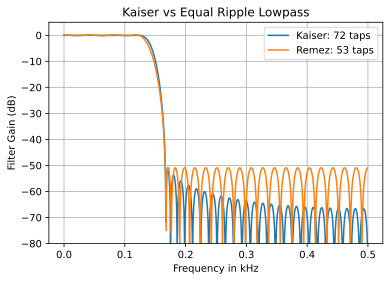

In [ ]:
fir_d.freqz_resp_list([b_k, b_r], [[1], [1]], 'dB', fs=1)
# Mengatur batas sumbu y pada plot
ylim([-80, 5])
# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Lowpass')
# Menambahkan label pada sumbu y
ylabel(r'Filter Gain (dB)')
# Menambahkan label pada sumbu x
xlabel(r'Frequency in kHz')
# loc='best': Menempatkan legenda pada lokasi terbaik secara otomatis
legend((r'Kaiser: %d taps' % len(b_k), r'Remez: %d taps' % len(b_r)), loc='best')
# Menambahkan grid pada plot untuk memudahkan pembacaan
grid()

Gambar tersebut menunjukkan perbandingan respons frekuensi dari dua filter lowpass digital: filter Kaiser dan filter Equal Ripple (Remez). Grafik menampilkan "Filter gain" dalam desibel (dB) terhadap "Frequency in kHz" (frekuensi dalam kiloHertz).

**1. Kurva Oranye**: Menunjukkan filter Kaiser dengan 72 taps. Grafik ini memperlihatkan peredaman yang halus dan stabil terhadap frekuensi, dengan mulai meredam kuat sekitar 0.15 kHz.

**2. Kurva Biru**: Menunjukkan filter Equal Ripple (Remez) dengan 53 taps. Grafik ini menampilkan variasi 'ripple' yang lebih tidak teratur pada gain filter, mencerminkan desain yang meminimalkan error maksimal antara respons yang diinginkan dan yang sebenarnya dengan perubahan gain dan penurunan yang lebih sering.


In [ ]:
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

Kaiser Win filter taps = 72.

Remez filter taps = 53.

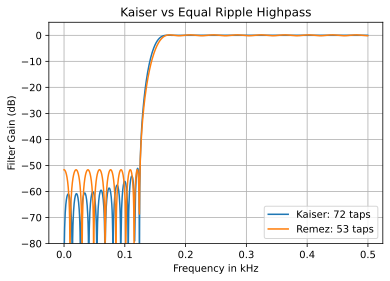

In [ ]:
fir_d.freqz_resp_list([b_k_hp, b_r_hp], [[1], [1]], 'dB', fs=1)
# Mengatur batas sumbu y pada plot
ylim([-80, 5])
# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Highpass')
# Menambahkan label pada sumbu y
ylabel(r'Filter Gain (dB)')
# Menambahkan label pada sumbu x
xlabel(r'Frequency in kHz')
# loc='best': Menempatkan legenda pada lokasi terbaik secara otomatis
legend((r'Kaiser: %d taps' % len(b_k_hp), r'Remez: %d taps' % len(b_r_hp)), loc='best')
# Menambahkan grid pada plot untuk memudahkan pembacaan
grid()


Grafik tersebut menunjukkan perbandingan performa dua filter lowpass: filter Kaiser dan filter Equal Ripple (Remez). Grafik menampilkan respons frekuensi terhadap gain filter dalam desibel (dB) dari 0 hingga 0.5 kHz.

**1. Kurva Biru (Kaiser 72 taps):** Menampilkan respons frekuensi filter Kaiser dengan 72 taps. Kurva ini sangat mulus dan menunjukkan penurunan signifikan di sekitar frekuensi cutoff (sekitar 0.1 kHz), menandakan kemampuan filter ini dalam memblokir frekuensi tinggi.

**2. Kurva Oranye (Remez 53 taps):** Menampilkan respons frekuensi filter Remez dengan 53 taps. Filter ini menunjukkan karakteristik "equal ripple" dengan gelombang-gelombang pada passband dan stopband. Kurva ini juga menunjukkan penurunan di sekitar frekuensi cutoff, tetapi dengan lebih banyak osilasi (ripples) dibandingkan filter Kaiser.

In [ ]:
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

Kaiser Win filter taps = 142.

Remez filter taps = 101.

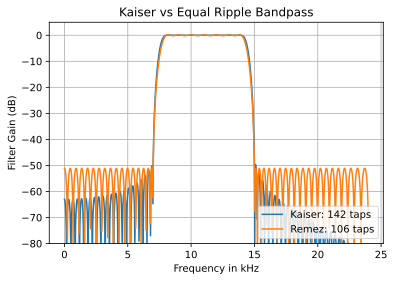

In [ ]:
fir_d.freqz_resp_list([b_k_bp, b_r_bp], [[1], [1]], 'dB', fs=48)
# Mengatur batas sumbu y pada plot
ylim([-80, 5])
# Menambahkan judul pada plot
title(r'Kaiser vs Equal Ripple Bandpass')
# Menambahkan label pada sumbu y
ylabel(r'Filter Gain (dB)')
# Menambahkan label pada sumbu x
xlabel(r'Frequency in kHz')
# loc='lower right': Menempatkan legenda di sudut kanan bawah
legend((r'Kaiser: %d taps' % len(b_k_bp), r'Remez: %d taps' % len(b_r_bp)), loc='lower right')
# Menambahkan grid pada plot untuk memudahkan pembacaan
grid()

Gambar tersebut menunjukkan grafik perbandingan respons frekuensi dua jenis filter digital: filter Kaiser dan filter Remez (Equal Ripple Bandpass). Grafik ini menampilkan gain filter dalam desibel (dB) sebagai fungsi dari frekuensi dalam kilohertz (kHz).

Berikut adalah beberapa poin penting yang diilustrasikan dalam grafik:

**1. Kurva Filter:**

 Grafik menampilkan dua kurva. Kurva oranye merepresentasikan filter Kaiser, sedangkan kurva biru mewakili filter Remez.

**2. Kinerja Filter pada Berbagai Frekuensi:**

Gain Filter: Di bagian tengah grafik, kedua filter menunjukkan gain tinggi sekitar 0 dB antara 5 kHz dan 10 kHz, menunjukkan bahwa keduanya dirancang untuk melewatkan frekuensi dalam rentang ini tanpa banyak attenuasi.

Attenuasi Stopband: Di luar frekuensi passband (5-10 kHz), kedua filter menunjukkan penurunan signifikan, dengan attenuasi mencapai di bawah -60 dB, menunjukkan bahwa kedua filter efektif memblokir frekuensi di luar rentang ini.

**3. Jumlah Taps:**

Filter Kaiser menggunakan 142 taps.
Filter Remez menggunakan 101 taps. Taps merupakan parameter dalam desain filter yang terkait dengan kompleksitas dan kelancaran respons frekuensi filter.

**4. Performa Filter:**

 Filter Kaiser menunjukkan beberapa variasi kecil (ripple) di passband, sedangkan filter Remez, sesuai namanya ("Equal Ripple"), memiliki variasi yang lebih teratur dan mungkin lebih kecil di passband. Ini mencerminkan karakteristik desain masing-masing filter, di mana Remez berusaha meminimalkan variasi maksimal di seluruh band pass dan stop.

## Contoh Desain yang Berguna untuk Interpolasi atau Desimasi
Di sini kita mempertimbangkan desain lowpass yang perlu melewati frekuensi dari [0, 4000] Hz dengan sampling rate 96000 Hz. Skenario ini muncul saat membangun interpolator menggunakan kelas-kelas modul scikit-dsp-comm multirate_helper.py untuk meningkatkan sampling rate dari 8000 Hz menjadi 96000 Hz, atau faktor interpolasi sebesar $L = 12$. Perhatikan di bagian atas notebook ini kita juga memiliki impor

```python
import sk_dsp_comm.multirate_helper as mrh`
```

Mulailah dengan desain equalripple yang memiliki transition band yang terpusat pada 4000 Hz dengan ripple passband sebesar 0.5 dB dan attenuasi stopband sebesar 60 dB.0 rh

In [ ]:
import sk_dsp_comm.multirate_helper as mrh

In [ ]:
b_up = fir_d.fir_remez_lpf(3300, 4300, 0.5, 60, 96000)

# Menggunakan metode fir_remez_lpf dari modul fir_d untuk mendesain filter low-pass menggunakan algoritma Remez.
# Parameter yang digunakan untuk desain filter adalah sebagai berikut:
# - 3300: Frekuensi cut-off bawah (dalam Hertz)
# - 4300: Frekuensi cut-off atas (dalam Hertz)
# - 0.5: Ripple di passband (dalam dB)
# - 60: Attenuasi minimum di stopband (dalam dB)
# - 96000: Frekuensi sampling (dalam Hertz)

Remez filter taps = 196.

In [ ]:
mr_up = mrh.multirate_FIR(b_up)

# Menggunakan metode multirate_FIR dari modul mrh untuk mengaplikasikan filter multirate pada koefisien filter FIR yang telah didesain.
# Parameter yang digunakan adalah:
# - b_up: Koefisien filter yang didesain menggunakan fir_remez_lpf

FIR filter taps = 196

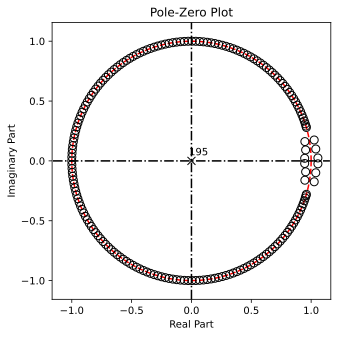

In [ ]:
# Take a look at the pole-zero configuration of this very
# high-order (many taps) linear phase FIR
mr_up.zplane()

Di atas adalah sebuah diagram yang disebut "Pole-Zero Plot," yang umumnya digunakan dalam analisis sistem kontrol dan pemrosesan sinyal. Diagram ini memvisualisasikan lokasi kutub (poles) dan nol (zeros) dari fungsi transfer dalam bidang kompleks. Kutub ditunjukkan dengan tanda 'x' sedangkan nol ditunjukkan dengan lingkaran kosong.

**1. Sumbu Horizontal (Bagian Real):** Mewakili bagian real dari bilangan kompleks.

**2. Sumbu Vertikal (Bagian Imaginer):** Mewakili bagian imajiner dari bilangan kompleks.

Dalam plot ini, terdapat sebuah kelompok kutub (tanda 'x') yang berada tepat pada lingkaran unit, yang bisa menunjukkan sistem yang mungkin osilatif atau stabil tepi (marginally stable) tergantung pada konteksnya. Ada pula sebuah grup nol (lingkaran kosong) yang berada di sekitar sumbu real antara nilai 0.8 hingga 1.0. Ini mungkin mengindikasikan frekuensi di mana output sistem akan mencapai nilai minimum atau nol.

Posisi kutub dan nol sangat berperan dalam menentukan sifat respons frekuensi sistem, seperti stabilitas, resonansi, dan pelemahan.

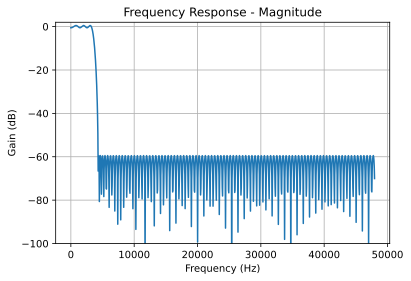

In [ ]:
# Verify the passband and stopband gains are as expected
mr_up.freq_resp('db',96000)

Gambar di atas adalah grafik respons frekuensi yang menampilkan magnitudo. Grafik ini menggambarkan bagaimana suatu sistem atau komponen elektronik merespons berbagai frekuensi yang diberikan. Terdapat dua aspek utama yang ditampilkan dalam grafik ini:

**1. Frekuensi** (sumbu horizontal: Hz) - Menunjukkan rentang frekuensi dari sinyal input yang diberikan, mulai dari 0 Hz hingga 50.000 Hz.

**2. Gain** (sumbu vertikal: dB) - Mengukur penguatan atau redaman sistem pada frekuensi tertentu, dinyatakan dalam desibel (dB).

Pada bagian awal grafik (dekat 0 Hz), terlihat bahwa gain sistem sangat tinggi (mendekati 0 dB), menandakan sedikit atau tanpa redaman pada frekuensi rendah. Namun, pada frekuensi sekitar 100 Hz dan di bawahnya, terjadi penurunan signifikan pada gain hingga di bawah -40 dB. Penurunan ini berlanjut hingga melalui seluruh rentang hingga 50.000 Hz. Kemudian, grafik menunjukkan fluktuasi yang stabil dan rendah pada gain, berada di kisaran antara -60 dB hingga -80 dB untuk sebagian besar rentang frekuensi tinggi, menunjukkan redaman yang tinggi pada frekuensi-frekuensi tersebut.

In [ ]:
(len(b_up-1))/2

98.0

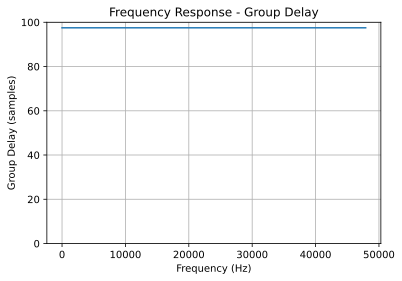

In [ ]:
# Verify that the FIR design has constant group delay (N_taps - 1)/2 samples
mr_up.freq_resp('groupdelay_s',96000,[0,100])

Objek mr_up sekarang dapat digunakan untuk interpolasi atau desimasi dengan faktor perubahan laju sebesar 12.

Gambar diatas menampilkan grafik yang mengilustrasikan "Group Delay" sebagai fungsi frekuensi (dalam Hz). Grafik ini adalah kosong, yang menunjukkan tidak ada data yang diplot atau tingkat tunda kelompok yang diwakili belum ditentukan untuk setiap frekuensi.

Grafik ini digunakan dalam analisis sistem elektronik atau pemrosesan sinyal, seperti dalam bidang akustik atau telekomunikasi, untuk menunjukkan bagaimana waktu tunda kelompok berubah seiring dengan frekuensi. Grup delay adalah suatu ukuran tentang seberapa cepat atau lambat sinyal melewati sistem pada frekuensi tertentu. Pada sumbu vertikal, grup delay dinyatakan dalam "Samples" dan pada sumbu horizontal frekuensi disajikan dalam Hertz (Hz). Jarak antar titik sumbu horizontal adalah 10,000 Hz dan sumbu vertikal terlihat dibagi menjadi interval tetapi skala tidak terlihat secara spesifik.

## Desain Bandpass Respons Amplitudo
Di sini kita pertimbangkan desain bandpass FIR dan IIR untuk digunakan dalam demodulator SSB untuk menghapus sinyal saluran sebelah yang mungkin berada di kedua sisi dari sebuah pita frekuensi yang berjalan dari 23 kHz hingga 24 kHz.

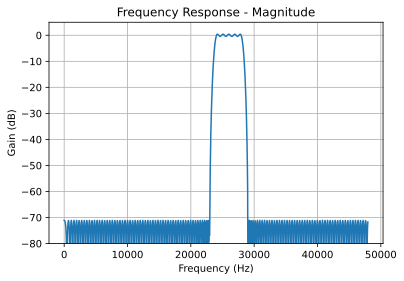

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)
ylim([-80, 5])
grid();

Gambar ini menunjukkan "Frequency Response - Magnitude" atau Respon Frekuensi dalam desibel (dB) terhadap Frekuensi dalam Hertz (Hz).

Berikut adalah penjelasan dari grafik tersebut:

1. **Sumbu Y (Gain dB):**

- Sumbu vertikal (Y-axis) menunjukkan gain atau penguatan dalam desibel (dB). Nilai gain ini menunjukkan seberapa banyak sinyal diperkuat pada berbagai frekuensi.

2. **Sumbu X (Frequency Hz):**

- Sumbu horizontal (X-axis) menunjukkan frekuensi dalam Hertz (Hz). Frekuensi ini berkisar dari 0 Hz hingga 50,000 Hz dalam grafik ini.

3. **Respon Frequency:**

- Grafik ini menunjukkan bahwa filter (atau sistem) memiliki respon frekuensi dari sekitar 20,000 Hz hingga 25,000 Hz dimana gain mendekati 0 dB, seolah-olah sinyal melewati tanpa banyak penguatan atau pelemahan.
- Di luar rentang frekuensi ini (baik di bawah 20,000 Hz maupun di atas 25,000 Hz), gain turun drastis mendekati -80 dB. Ini berarti bahwa sinyal pada frekuensi-frekuensi tersebut sangat dilemahkan.
Jenis Filter:

Berdasarkan grafik ini, bisa disimpulkan bahwa filter ini adalah sebuah band-pass filter, yang melewatkan frekuensi antara 20,000 Hz hingga 25,000 Hz sambil melemahkan frekuensi di luar rentang tersebut.
Secara ringkas, grafik menunjukan bahwa filter ini didesain untuk memperbolehkan sinyal dalam rentang frekuensi 20,000 Hz hingga 25,000 Hz sementara melemahkan sinyal di luar rentang tersebut secara signifikan.

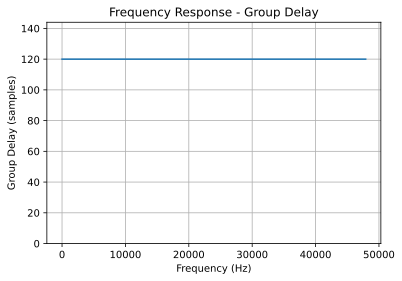

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)
grid();

Gambar diatas menunjukkan diagram tanggapan frekuensi, khususnya tanggapan kelompok tunda (group delay) pada rentang frekuensi dari 0 hingga 50.000 Hz. Berikut adalah penjelasan rinci mengenai elemen-elemen dalam grafik ini:

1. **Judul Grafik:** "Frequency Response - Group Delay"

- Menunjukkan bahwa grafik ini memvisualisasikan tanggapan frekuensi dalam bentuk kelompok tunda.

2. **Sumbu Horizontal (X-Axis):**
"Frequency (Hz)"

- Sumbu ini mewakili frekuensi dalam satuan Hertz (Hz) dengan rentang dari 0 hingga 50.000 Hz.

3. **Sumbu Vertikal (Y-Axis):**
"Group Delay (samples)"

- Sumbu ini mewakili kelompok tunda dalam satuan sampel.

4. **Data Plot:**

- Data yang ditampilkan adalah garis horizontal konstan pada nilai 120 sampel sepanjang seluruh rentang frekuensi dari 0 hingga 50.000 Hz.

5. **Interpretasi:**

- Tanggapan kelompok tunda yang konstan pada nilai 120 sampel untuk seluruh frekuensi yang diukur menunjukkan bahwa perangkat atau sistem yang diuji memiliki tunda kelompok yang seragam, tanpa variasi dengan perubahan frekuensi dalam rentang yang ditampilkan.

Kesimpulannya, grafik ini mengindikasikan bahwa kelompok tunda tetap stabil di angka 120 sampel untuk semua frekuensi hingga 50.000 Hz, yang merupakan karakteristik penting dalam menganalisis perilaku sistem dalam domain waktu dan frekuensi.

#**Jobsheet 6 FIR**

## **Pemilihan Filter**

Pemilihan jenis filter sering menjadi pertimbangan penting bagi pengembang perangkat digital. Pilihan antara filter FIR dan IIR dilakukan berdasarkan kriteria berikut:

- Karakteristik fase dari filter IIR bersifat non-linear. Filter FIR dapat memiliki karakteristik fase yang secara ketat linear. Ini berarti filter tersebut tidak menyebabkan distorsi pada bentuk sinyal.
- Filter FIR stabil karena diimplementasikan dalam bentuk non-rekursif. Filter IIR dapat menjadi tidak stabil.
- Dalam kasus nyata, pertanyaan tentang pemilihan resolusi data (pembulatan, kuantisasi) menjadi kurang signifikan dalam perangkat tanpa umpan balik, yaitu dalam filter FIR.
- Implementasi respons frekuensi dengan bentuk yang kompleks atau maksimal persegi membutuhkan jumlah koefisien filter FIR yang signifikan. Filter IIR lebih efisien dalam menangani tugas ini.
- Filter FIR umumnya tidak memiliki filter analog yang setara.
- Filter FIR memungkinkan untuk dengan mudah mendapatkan karakteristik yang diinginkan (level penurunan, ketidakmerataan di jalur lewat, frekuensi cut-off, dll.)
- Filter IIR jauh lebih efisien dalam hal jumlah operasi perkalian, penambahan, dan jumlah elemen penundaannya.



### Contoh

Misalkan ada filter yang dijelaskan oleh fungsi transfer berikut:

$$H(z) = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2}}{1 + a_1 z^{-1} + a_2 z^{-2}}$$

Dimana :
- $N = 2$, $M = 2$
- $b_i = {0.1, -0.6, 0.5}$
- $a_i = {1, 0.7, -0.2}$


Jumlah persamaan diferensial untuk filter tertentu sama dengan jumlah penjumlah pada skema. Dengan mengetahui persamaan diferensial, kita dapat menemukan karakteristik impuls filter: sinyal impuls satu unit diterapkan ke input (kondisi awalnya nol).

Kita akan menemukan karakteristik impuls menggunakan Python. Dengan menggunakan fungsi `lfilter(b, a, x)`, proses melewati sinyal x melalui filter digital dipodelkan, dengan koefisien karakteristik transfer `a` dan `b`.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

FONT_SMALL = 12
FONT_MEDIUM = 14

plt.rc('axes', titlesize=FONT_MEDIUM)
plt.rc('axes', labelsize=FONT_SMALL)
plt.rc('xtick', labelsize=FONT_SMALL)
plt.rc('ytick', labelsize=FONT_SMALL)
plt.rc('legend', fontsize=FONT_MEDIUM)
plt.rc('figure', titlesize=FONT_MEDIUM)

%matplotlib inline

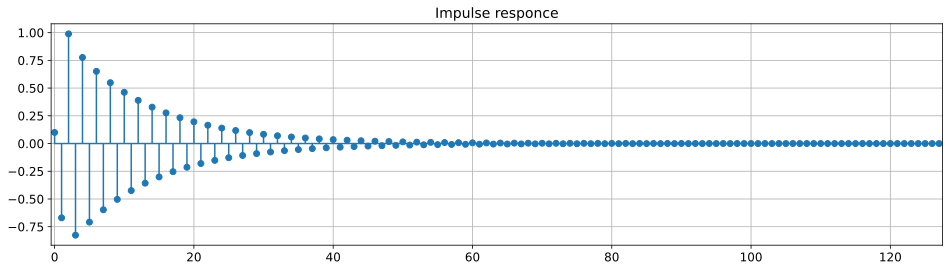

In [14]:
N = 128
# Delta-function
x = np.zeros(N)
x[0] = 1

# Input signal:
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] / a0 + a1*z^(-1) + a2*z^(-2)
b = [0.1, -0.6, 0.5]
a = [1, 0.7, -0.2]

y1 = lfilter(b, a, x)

plt.figure(figsize=(16, 4), dpi=80)
plt.title('Impulse responce')
plt.stem(y1, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.grid(True)

Gambar diatas menunjukkan grafik respons impuls suatu sistem. Respons impuls adalah output dari suatu sistem ketika diberikan impuls satuan sebagai input. Grafik ini memberikan wawasan tentang karakteristik dinamika sistem tersebut.


**1. Label Sumbu dan Judul:**

- Judul grafik: "Impulse Response"
- Sumbu horizontal (x-axis): Menunjukkan waktu atau indeks setiap langkah dalam unit yang tidak ditentukan dalam gambar ini.
- Sumbu vertikal (y-axis): Menunjukkan amplitudo respons impuls dari sistem.

**2. Karakteristik Grafik:**

- **Amplitudo dan Osilasi:** Grafik menunjukkan osilasi yang berkurang (menurun) seiring waktu. Awalnya, amplitudo respons impuls mulai dari 1, kemudian berosilasi antara nilai positif dan negatif dengan amplitudo yang semakin mengecil.
- **Damping (Redaman):** Amplitudo osilasi berkurang secara bertahap yang menunjukkan adanya redaman dalam sistem.
- **Stabilitas:** Akhirnya, amplitudo grafik mendekati nol, yang menunjukkan bahwa sistem tersebut stabil seiring waktu.

Secara keseluruhan, gambar ini adalah representasi umum dari respons impuls dari sistem linier waktu-invarian (LTI) yang cenderung berosilasi dan kemudian meredam seiring waktu menuju nilai nol.

**Jika filter stabil, maka nilai-nilai y(n) akan berkurang seiring waktu.**

Seperti yang terlihat pada grafik sebelumnya, filter IIR yang dihitung adalah stabil.

### **Filter FIR Rekursif**

Seperti yang disebutkan sebelumnya, filter FIR biasanya dibangun dalam bentuk non-rekursif, namun ada cara untuk mengubah filter menjadi bentuk rekursif.

Mari kita lihat contoh berikut. Mari kita tulis karakteristik transfer filter:

$$H(z) = 1 + z^{-1} + z^{-2} + z^{-3}$$

Kita akan mengalikan fungsi transfer dengan

$$\frac{1-z^{-1}}{1-z^{-1}}$$

Kami akan melewati langkah-langkah matematis (jika Anda ingin, Anda bisa melakukannya sendiri karena sifat trivial dari masalah yang dipertimbangkan) dan menulis hasilnya:

$$H(z) = \frac{1-z^{-3}}{1-z^{-1}}$$

Skema struktural dari filter tersebut ditunjukkan pada gambar berikut. Ini terdiri dari dua rantai: elemen tanpa umpan balik - yang diferensiasi, dan elemen dengan umpan balik - yang mengintegrasi (penjumlah dengan umpan balik).





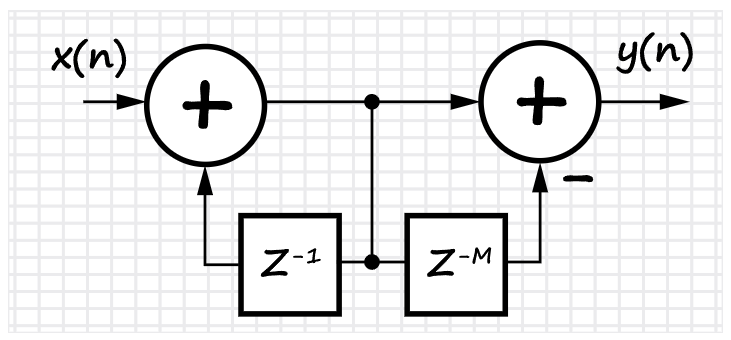

Mari kita buat ilustrasi bahwa sinyal yang melewati filter FIR rekursif memiliki karakteristik yang serupa.

In [6]:
N = 40
# Delta-function
x = np.zeros(N)
x[0] = 1

# Filter order - M
M = 16
# Input signal
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)
a = [1]

y1 = lfilter(b, a, x)

# Change to recursive form
b = np.zeros(M)
b[0] = 1
b[M-1] = -1

a = [1, -1]
y2 = lfilter(b, a, x)

# Check the difference
np.all(y1 == y2)

True

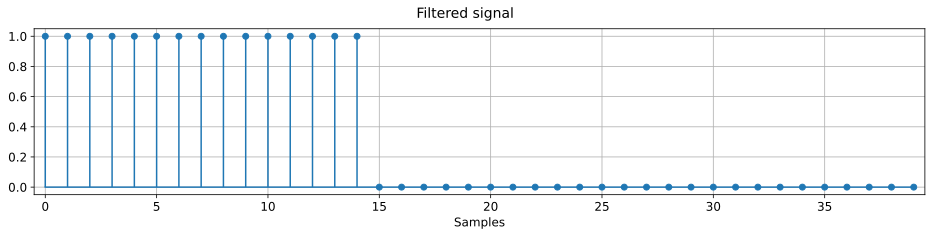

In [7]:
plt.figure(figsize=(16, 3), dpi=80)
plt.stem(y2, basefmt='C0')
plt.xlim([-0.5, N-0.5])
plt.xlabel('Samples')
plt.suptitle('Filtered signal')
plt.grid(True)

Gambar diatas menunjukkan grafik sinyal yang telah difilter (Filtered signal). Grafik ini memplotkan besar sinyal (y-axis) terhadap jumlah sampel (x-axis).

Berikut adalah beberapa poin penting mengenai grafik ini:

- Sumbu x mewakili `Samples` (jumlah sampel dari sinyal).
- Sumbu y mewakili amplitudo atau besar sinyal yang telah difilter.
- Pada bagian pertama grafik (sampai sekitar sampel ke-13), amplitudo sinyal konstan di angka 1.0.
- Setelah sampel ke-13, amplitudo sinyal turun drastis hingga mendekati 0 dan tetap mendekati 0 untuk sisa sampel.

Secara umum, ini menunjukkan bahwa filter yang digunakan hanya memungkinkan nilai sinyal tetap pada level 1.0 untuk sejumlah sampel pertama (sekitar 13 sampel), kemudian meredam sinyal secara signifikan setelahnya. Ini bisa menunjukkan jenis filter yang memotong sinyal secara drastis pada titik tertentu, mungkin sebuah low-pass filter atau filter lainnya yang memiliki cutoff point yang jelas.

Seperti yang terlihat dari grafik, karakteristik impuls filter rekursif adalah vektor satu. Selain itu, panjang vektor sama dengan panjang filter.



## **Filter FIR Homogen**

Filter FIR yang disebut homogen adalah filter FIR yang tidak memerlukan operasi perkalian. Oleh karena itu, filter tersebut bekerja cukup cepat dan dapat diimplementasikan dengan baik di FPGA.

Kekurangan dari filter semacam itu adalah tingkat penekanannya yang tinggi pada sisi gelombang. Sisi gelombang dalam respons frekuensi ditekan dengan mengkaskadkan filter, di mana posisi nol tidak berubah, tetapi hanya perbandingan antara level dari sisi utama dan sisi gelombang yang berubah, sehingga level relatif sisi gelombang menurun ketika respons frekuensi dikalikan.

Kekurangan kedua dari filter homogen adalah bentuk tidak persegi respons frekuensinya. Untuk membuatnya lebih persegi, filter FIR korektif digunakan, sehingga bentuk dari puncak utamanya menjadi lebih persegi, tetapi tingkat sisi gelombang meningkat.

Pada bagian yang terkait dengan decimation dan interpolation dari sinyal, kita akan menjelajahi lebih lanjut tentang filter ini.

Anda dapat menggunakan fungsi `freqz` untuk menemukan karakteristik frekuensi filter.

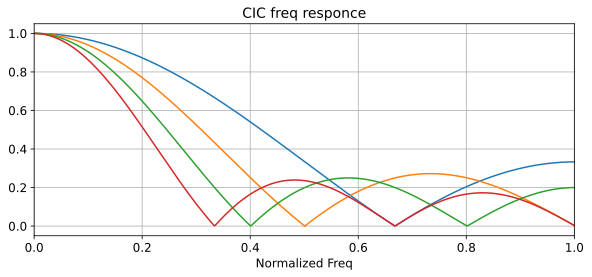

In [8]:
N = 512
f = np.linspace(0, 1, N, endpoint=True)
b = [1, 1, 1]

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
for i in range(4):
    _, h = freqz(b, N)
    h = np.abs(h)
    plt.plot(f, h/np.max(h))
    plt.xlim([0, 1])
    plt.grid(True)
    b.append(1)
plt.xlabel('Normalized Freq')
plt.title('CIC freq responce')
plt.tight_layout()

Gambar diatas menunjukkan grafik respons frekuensi dari sebuah filter CIC (Cascaded Integrator-Comb). Berikut penjelasan lebih rinci elemen-elemennya:

**1. Sumbu X (Normalized Freq):**

- Sumbu horizontal mewakili frekuensi yang dinormalisasi dari 0 hingga 1.

**2. Sumbu Y (Amplifikasi Respons Frekuensi):**

- Sumbu vertikal mewakili amplifikasi (atau peredaman) dari sinyal pada frekuensi tertentu, dari 0 hingga 1.

**3. Kurva-Kurva Berwarna:**

- Setiap kurva warna (merah, biru, hijau, oranye) menunjukkan respons frekuensi dari filter CIC pada berbagai kondisi atau parameter yang berbeda.
- Kurva-kurva ini menunjukkan bagaimana filter mengubah atau meredam sinyal pada berbagai frekuensi.

**4. Respons Frekuensi:**

- Filter CIC sering digunakan dalam pemrosesan sinyal digital, terutama untuk decimation (pengurangan laju sampel) atau interpolasi (peningkatan laju sampel).
- Biasanya, filter ini memiliki formasi comb untuk menekan aliasing dan integrator untuk akumulasi sinyal.

**5. Pola Pengurangan:**

- Setiap kurva menunjukkan penurunan yang khas di awal frekuensi (0) hingga suatu titik tertentu sebelum mengalami osilasi atau perubahan lainnya yang mencerminkan performa filter CIC pada berbagai frekuensi.

## **Perhitungan Filter Konvolusi Tak Hingga dengan Metode Jendela:**
Metode `firwin` dan `firwin2 ` mengembalikan koefisien filter FIR.

### **Metode firwin:**

- `numtaps` - urutan filter,
- `cutoff` - frekuensi cutoff relatif terhadap laju sampel fs.
- `width` - jika nilai ditentukan, menunjukkan lebar transisi dari jalur lintasan ke jalur penekanan.
- `window` - fungsi jendela. Digunakan bersamaan dengan metode get_window atau langsung menetapkan nama jendela.
- `fs` - laju sampel atau frekuensi Nyquist. Jika nilai tidak ditentukan, secara default sama dengan s#### atu.

### **Metode firwin2:**

- `numtaps` - urutan filter,
- `freq` - urutan frekuensi monotonik tak menurun. Semua elemen harus non-negatif dan kurang dari atau sama dengan frekuensi Nyquist yang ditentukan oleh parameter fs.
- `gain` - urutan amplitudo yang berisi penguatan dan redaman yang diinginkan pada nilai frekuensi yang ditentukan dari freq.
- `window` - fungsi jendela. Digunakan bersamaan dengan metode get_window atau langsung menetapkan nama jendela.
- `fs` - laju sampel atau frekuensi Nyquist. Jika nilai tidak ditentukan, secara default sama dengan satu.

### Fungsi jendela

Bab khusus didedikasikan untuk fungsi jendela dan karakteristiknya, namun mari sebutkan beberapa fungsi jendela yang paling umum digunakan dalam kasus praktis: Kaiser, Gauss, Blackman-Harris, jendela dengan puncak datar, Hamming, Hann, dan sebagainya.

Untuk memilih fungsi jendela, digunakan metode `get_window`. Argumen masukan - nama jendela dan panjang karakteristik impuls.

Fungsi ini mengembalikan larik satu dimensi koefisien - nilai karakteristik impuls. Koefisien ini dengan operasi konvolusi "ditempatkan" pada karakteristik impuls filte tersebut.

### Gelombang grup

Ini adalah fungsi bantuan untuk menghitung penundaan grup filter digital. Parameter masukan - larik koefisien `a, b`. Metode mengembalikan kumpulan frekuensi dan larik penundaan grup yang sesuai untuk frekuensi tersebut.

### Contoh

Contoh pertama - menggunakan fungsi `firwin2`. Mari tentukan larik frekuensi yang dinormalisasi dari 0 hingga 1. Tentukan penguatan pada frekuensi yang dipilih, serta urutan filter. Mari kita buat karakteristik impuls.

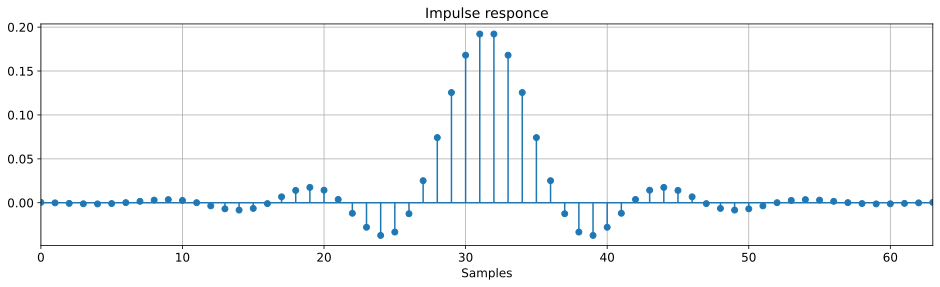

In [10]:
N = 100
# List of freqs
lst_freqs = np.linspace(0, 1, N)

# List of gains
lst_gain = np.zeros(N)
lst_gain[0:20] = 1

# FIR filter taps
NFIR = 64
taps = firwin2(NFIR, lst_freqs, lst_gain)

plt.figure(figsize=(16, 4), dpi=100)
plt.title('Impulse responce')
plt.stem(taps, basefmt='C0')
plt.xlim([0, NFIR-1])
plt.xlabel('Samples')
plt.grid(True)

Gambar diatas menunjukkan grafik tanggapan impuls (impulse response) dari sebuah sistem. Tanggapan impuls adalah respons dari sistem terhadap sinyal masukan yang berupa impuls, yang biasanya diwakili oleh delta Kronecker.

Berikut adalah penjelasan rinci tentang elemen-elemen dalam gambar:

**1. Sumbu Horizontal (X-axis):**
- Dilabeli sebagai "Samples" menunjukkan nomor sampel data. Dalam hal ini, rentang sampel dari 0 hingga sekitar 60.

**2. Sumbu Vertikal (Y-axis):**
- Menunjukkan amplitudo tanggapan impuls. Rentangnya dari sekitar -0.05 hingga 0.20.

**3. Garis dan Titik Data:**
- Pada grafik terdapat titik-titik biru yang terhubung dengan garis, yang menunjukkan nilai amplitudo tanggapan impuls pada setiap sampel. Nilai amplitudo ini mencerminkan seberapa besar sistem merespons pada setiap titik waktu setelah menerima input impuls.

**4. Label 'Impulse Response' di Tengah Atas:**
- Menunjukkan bahwa grafik ini adalah visualisasi dari tanggapan impuls.

Dari grafik tersebut, terlihat bahwa nilai amplitudo paling besar berada di sekitar sampel ke-30, menandakan respon maksimum dari sistem. Selanjutnya, nilai amplitudo menurun secara bertahap baik ke kiri maupun ke kanan dari sampel ke-30, dan akhirnya mendekati nol setelah beberapa waktu (sampel).

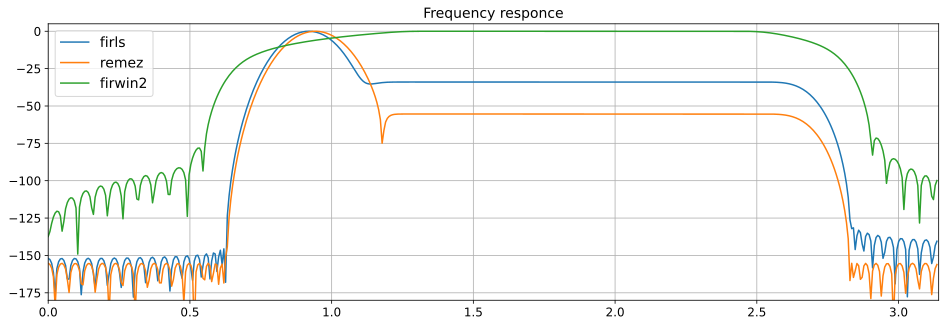

In [11]:
# Input parameters
fs = 10
N = 117
desired = (0, 0, 1, 1, 0, 0)
bands = (0, 1, 2, 4, 4.5, 5)

# FIR filters
fir_firls = firls(N, bands, desired, fs=fs)
fir_remez = remez(N, bands, desired[::2], fs=fs)
fir_firwin2 = firwin2(N, bands, desired, fs=fs)

# PLot results and calculate FFTs
plt.figure(figsize=(16, 5))
plt.title('Frequency responce')
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)
    resp = np.abs(resp)
    resp /= np.max(resp) + 10**(-15)
    plt.plot(freq, 20*np.log10(resp))
plt.xlim([0, np.pi])
plt.ylim([-180, 5])
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')
plt.grid(True)

Gambar diatas adalah grafik respons frekuensi dari tiga jenis filter yang berbeda, yaitu 'firls', 'remez', dan 'firwin2'. Berikut ini adalah penjelasan mengenai gambar diatas:

**1. Sumbu Horizontal (X-Axis):**

- Sumbu horizontal merepresentasikan frekuensi. Ini biasanya diukur dalam satuan normalisasi, di mana nilai 1.0 setara dengan setengah dari frekuensi sampling (frekuensi Nyquist).

**2. Sumbu Vertikal (Y-Axis):**

- Sumbu vertikal merepresentasikan atenuasi atau gain dalam dB (decibel).

**3. Kurva:**

- **Kurva Biru ('firls'):** Menunjukkan respons frekuensi dari filter yang dirancang menggunakan metode 'firls' (Least Squares).
- **Kurva Hitam ('remez'):** Menunjukkan respons frekuensi dari filter yang dirancang menggunakan metode 'remez' (alternating optimization atau Parks-McClellan).
- **Kurva Oranye ('firwin2'):** Menunjukkan respons frekuensi dari filter yang dirancang menggunakan metode 'firwin2' (arbitrary gain).

**4. Interpretasi Gambar:**

- **Passband:** Bagian grafik di mana kurva tetap mendekati nilai 0 dB menunjukkan rentang frekuensi yang akan diteruskan oleh filter dengan minimal atenuasi. Dalam gambar ini, rentang frekuensi passband berada di sekitar nilai 0,0 hingga 0,5.
- **Stopband:** Bagian di mana kurva turun drastis menunjukkan rentang frekuensi yang diattenuasi secara signifikan oleh filter. Nilai dB di stopband biasanya sangat negatif menunjukkan bahwa sinyal pada frekuensi-frekuensi ini sangat teredam (contohnya, di nilai lebih dari 1.0).
- **Transisi:** Area di antara passband dan stopband di mana kurva mulai menurun menunjukkan daerah transisi filter.

**5. Perbedaan Antara Metode:**

- **'firls':** Memiliki respons frekuensi yang lebih halus tetapi dengan sedikit lebih banyak ripple (gelombang) di dalam passband dan stopband.
- **'remez':** Cenderung memberikan filter dengan passband yang lebih datar dan transisi yang lebih tajam tetapi mungkin menunjukkan beberapa ripples.
- **'firwin2':** Menawarkan fleksibilitas dalam penentuan frekuensi arbitrary gain dan mungkin menunjukkan perbedaan yang lebih signifikan dalam respons passband dan stopband dibandingkan dengan dua yang lainnya.


### Kaiser FIR Filter

Mari kita lihat bagaimana sinyal harmonik yang bising melewati filter FIR. Kita akan menambahkan beberapa sinyal harmonik frekuensi tinggi dengan amplitudo yang berbeda ke sinyal ini.

Seperti yang terlihat, sinyal bising tidak dapat dianalisis dengan baik dalam domain waktu. Namun, dengan melewatkannya melalui filter FIR dengan frekuensi cut-off yang dipilih sebelumnya, kita dapat memisahkan sinyal yang menarik dari gangguan.

Perlu dicatat bahwa semua sinyal dan noise yang masuk ke dalam jalur lintasan filter akan tetap ada dan akan berkontribusi pada karakteristik kualitatif sinyal hasil.

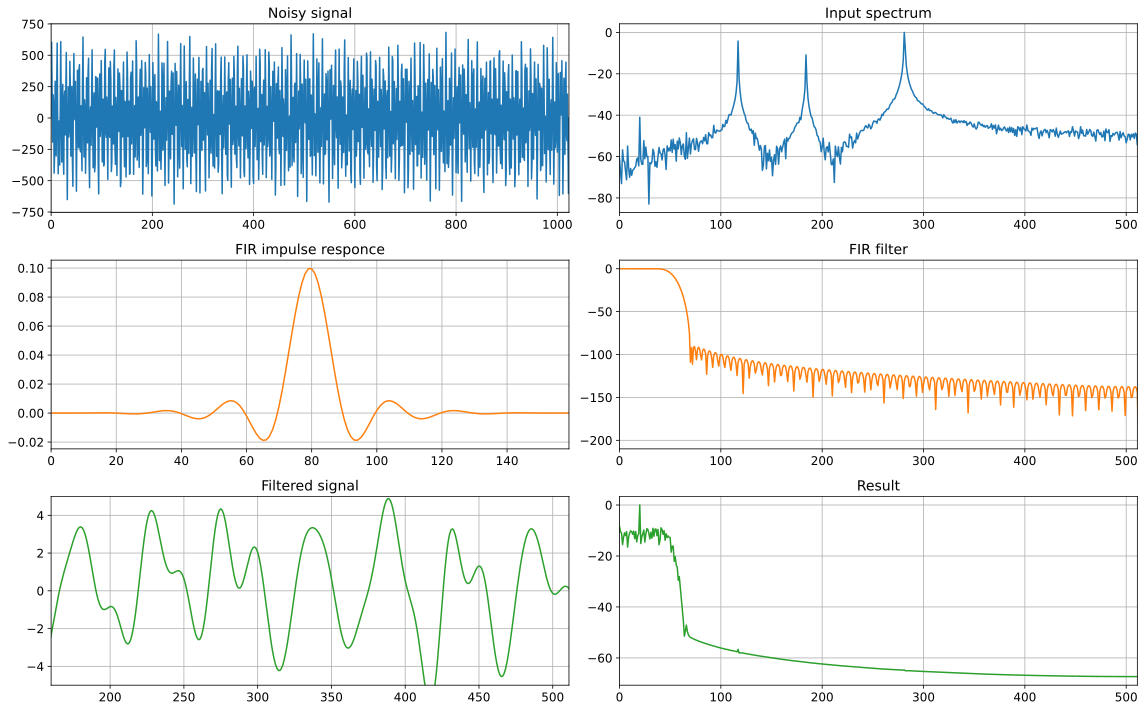

In [13]:
N = 1024
# Create input signal
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Add some white noise
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Kaiser FIR filter
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))
y = lfilter(h, 1, xn)

# List of input signals
lst_sig = [xn, h, y]

sig_titles = ['Noisy signal', 'FIR impulse responce', 'Filtered signal']
fft_titles = ['Input spectrum', 'FIR filter', 'Result']


plt.figure(figsize=(16, 10))
for i in range(3):
    # Calculate FFTs
    clc_fft = np.abs(fft(lst_sig[i], N))
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))

    # Plot signals
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)

    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Pada gambar di atas, terlihat bahwa sinyal keluaran yang difilter dengan sedikit distorsi menyerupai sinyal harmonik yang diinginkan. Namun, disayangkan bahwa mencapai bentuk gelombang harmonik yang ideal melalui filtrasi FIR atau IIR tidak mungkin, karena tujuan utama dari filter adalah untuk memotong komponen spektral yang tidak diinginkan. Untuk meningkatkan kualitas sinyal yang difilter, metode pemrosesan sinyal digital lainnya (spektral dan korelasi) diterapkan.

Berikut adalah penjelasan dari masing-masing subplot dalam gambar tersebut:

**1. Noisy signal (atas kiri):**

- Plot ini menunjukkan sinyal awal yang berisi banyak noise. Sinyal ini berfluktuasi dengan cepat dan memiliki amplitudo yang bervariasi secara acak.

**2. Input spectrum (atas kanan):**

- Ini adalah spektrum frekuensi dari sinyal noisy. Plot ini menunjukkan distribusi energi sinyal pada berbagai frekuensi. Kita bisa melihat adanya puncak yang menonjol pada frekuensi tertentu yang menunjukkan adanya komponen frekuensi yang dominan dalam sinyal noisy tersebut.

**3. FIR impulse response (tengah kiri):**

- Plot ini menunjukkan respons impuls dari filter FIR yang digunakan. Respons impuls adalah respons filter terhadap sinyal input yang berupa impulse (satu sinyal spike dan sisanya nol). Bentuk respons impuls ini menentukan karakteristik filter, seperti frekuensi cut-off.

**4. FIR filter (tengah kanan):**

- Plot ini menunjukkan respons frekuensi dari filter FIR. Ini menggambarkan bagaimana filter merespons berbagai frekuensi dari sinyal input. Biasanya, plot ini menunjukkan bagaimana filter melemahkan atau memperkuat sinyal pada frekuensi tertentu.

**5. Filtered signal (bawah kiri):**

- Plot ini menunjukkan sinyal setelah melewati filter FIR. Dibandingkan dengan sinyal awal yang berisik, sinyal yang telah difilter memiliki noise yang lebih sedikit dan lebih halus, menunjukkan bahwa filter telah berhasil mengurangi noise.

**6. Result (bawah kanan):**

- Ini adalah spektrum frekuensi dari sinyal yang telah difilter. Plot ini menunjukkan distribusi energi pada berbagai frekuensi dari sinyal yang sudah difilter. Setelah filtrasi, puncak-puncak frekuensi yang dominan pada spektrum input bisa saja melemah atau hilang, tergantung pada desain filter.

Keseluruhan gambar menunjukkan bagaimana sebuah sinyal yang awalnya penuh dengan noise dapat difilter untuk mendapatkan sinyal yang lebih bersih dan lebih dekat dengan sinyal asli yang tidak berisik. Filter FIR digunakan dalam proses ini untuk mengurangi komponen frekuensi tertentu yang dianggap sebagai noise.